In [1]:
#import depepndencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
#load dataframe
numts=pd.read_csv('../../data/ncbi_numts_p26.csv')

/var/folders/g2/9pvgl5793mxgz8dg4mhwym0m0000gn/T/ipykernel_8544/2102927653.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backen

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

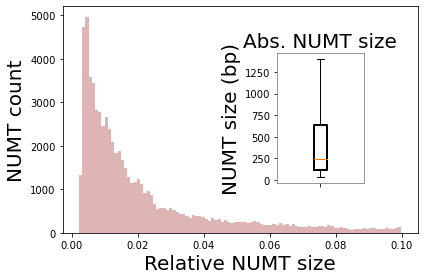

In [5]:
########################################################################
#numt sizes
#calculate relative (to mt size) numt size
rel_numt_size=numts['genomic_length']/(numts['mtDNA_size (Mb)']*1000000)

#visualize reuslts
fig,ax=plt.subplots(1,1)
ax.hist(rel_numt_size[rel_numt_size<0.1],color='brown',alpha=0.35,bins=100)
ax.set_xlabel('Relative NUMT size',fontsize=20)
ax.set_ylabel('NUMT count',fontsize=20)

l,b,w,h = .65, .35, .2, .45#left, bottom, width and height
ax1=fig.add_axes([l,b,w,h])
boxprops = dict(linestyle='-', linewidth=2, color='black')
ax1.boxplot(numts['genomic_length'],showfliers=False,boxprops=boxprops)
ax1.spines['top'].set_color('0.5')
ax1.spines['bottom'].set_color('0.5')
ax1.spines['left'].set_color('0.5')
ax1.spines['right'].set_color('0.5')
ax1.set_xticklabels([])
ax1.set_ylabel('NUMT size (bp)',fontsize=20)
ax1.set_title('Abs. NUMT size',fontsize=20)
plt.tight_layout()
plt.savefig('../../results/numt_lengths.eps',dpi=400)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

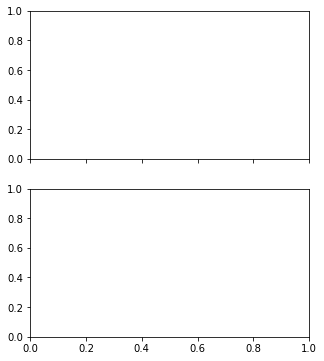

In [3]:
#numt content correlations II.
numts_per_genome=numts['gDNA_size (Mb)'].drop_duplicates().dropna().apply(lambda gDNA_size: len(numts.loc[numts['gDNA_size (Mb)']==gDNA_size])).tolist()
numt_bps_per_genome=(numts['gDNA_size (Mb)'].drop_duplicates().dropna().apply(lambda gDNA_size: sum(numts.loc[numts['gDNA_size (Mb)']==gDNA_size]['genomic_length']))/1000).tolist()
gid_sizes=numts['gDNA_size (Mb)'].drop_duplicates().dropna()
#visualize
fig,axs=plt.subplots(2,1,figsize=(5,6),sharex=True)
axs[0].plot(gid_sizes,numts_per_genome,'o',alpha=.5)
axs[0].set_ylabel('Number of NUMTs',fontsize=20)
a0,b0=np.polyfit(gid_sizes,numts_per_genome,1)
axs[0].plot(gid_sizes,a0*gid_sizes+b0,color='red',lw=1)
axs[0].text(.05,.9,f"Spearman= {np.round(spearmanr(gid_sizes,numts_per_genome)[0],2)}",transform=axs[0].transAxes)
axs[0].text(.05,.8,f"p= {np.round(spearmanr(gid_sizes,numts_per_genome)[1],5)}",transform=axs[0].transAxes)

axs[1].plot(gid_sizes,numt_bps_per_genome,'o',color='green',alpha=.5)
a1,b1=np.polyfit(gid_sizes,numt_bps_per_genome,1)
axs[1].plot(gid_sizes,a1*gid_sizes+b1,color='red',lw=1)
axs[1].set_xlabel('gDNA size (Mb)',fontsize=20)
axs[1].set_ylabel('NUMT bps (kb)',fontsize=20)
axs[1].text(.05,.9,f"Spearman= {np.round(spearmanr(gid_sizes,numt_bps_per_genome)[0],2)}",transform=axs[1].transAxes)
axs[1].text(.05,.8,f"p= {np.round(spearmanr(gid_sizes,numt_bps_per_genome)[1],5)}",transform=axs[1].transAxes)
plt.tight_layout()
plt.savefig('../../results/sizes_corr.eps',dpi=400)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


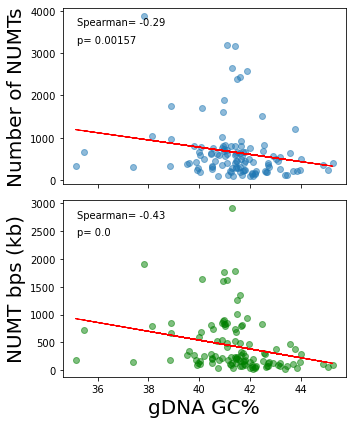

In [9]:
#GC vs numt counts and lengths
numt_p_g=numts['gDNA_GC'].drop_duplicates().dropna().apply(lambda gGC: len(numts.loc[numts['gDNA_GC']==gGC])).tolist()
numtbp_p_g=(numts['gDNA_GC'].drop_duplicates().dropna().apply(lambda gGC: sum(numts.loc[numts['gDNA_GC']==gGC]['genomic_length']))/1000).tolist()
gDNA_GCs=numts['gDNA_GC'].drop_duplicates().dropna()
#visualize
fig,axs=plt.subplots(2,1,figsize=(5,6),sharex=True)
axs[0].plot(gDNA_GCs,numt_p_g,'o',alpha=.5)
axs[0].set_ylabel('Number of NUMTs',fontsize=20)
a0,b0=np.polyfit(gDNA_GCs,numt_p_g,1)
axs[0].plot(gDNA_GCs,a0*gDNA_GCs+b0,color='red',lw=1)
axs[0].text(.05,.9,f"Spearman= {np.round(spearmanr(gDNA_GCs,numt_p_g)[0],2)}",transform=axs[0].transAxes)
axs[0].text(.05,.8,f"p= {np.round(spearmanr(gDNA_GCs,numt_p_g)[1],5)}",transform=axs[0].transAxes)

axs[1].plot(gDNA_GCs,numtbp_p_g,'o',color='green',alpha=.5)
a1,b1=np.polyfit(gDNA_GCs,numtbp_p_g,1)
axs[1].plot(gDNA_GCs,a1*gDNA_GCs+b1,color='red',lw=1)
axs[1].set_xlabel('gDNA GC%',fontsize=20)
axs[1].set_ylabel('NUMT bps (kb)',fontsize=20)
axs[1].text(.05,.9,f"Spearman= {np.round(spearmanr(gDNA_GCs,numtbp_p_g)[0],2)}",transform=axs[1].transAxes)
axs[1].text(.05,.8,f"p= {np.round(spearmanr(gDNA_GCs,numtbp_p_g)[1],5)}",transform=axs[1].transAxes)
plt.tight_layout()
plt.savefig('../../results/GC_corr.eps',dpi=400)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

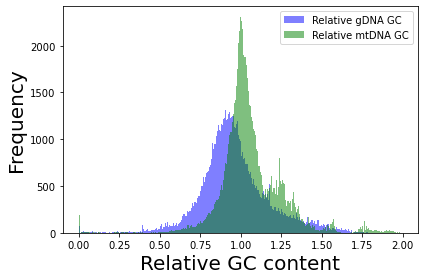

In [11]:
#relative GCs
GC_input=numts.dropna(subset=['genomic_sequence','mitochondrial_sequence','gDNA_GC','mtDNA_GC'])
#calculate numt GC and normalize it with the whole genome GC
gseq_GC=GC_input['genomic_sequence'].apply(lambda seq: (seq.upper().replace('-','').count('G')+seq.upper().replace('-','').count('C'))/len(seq.replace('-','')))
grel_GC=(gseq_GC)*100/GC_input['gDNA_GC']

#calculate numt corresponding mt seq GC and normalize it with whole mt GC
mtseq_GC=GC_input['mitochondrial_sequence'].apply(lambda seq: (seq.upper().replace('-','').count('G')+seq.upper().replace('-','').count('C'))/len(seq.replace('-','')))
mtrel_GC=(mtseq_GC)*100/GC_input['mtDNA_GC']

#visualize results
fig,axs=plt.subplots(1,1)
axs.hist(grel_GC,bins=300,color='blue',alpha=.5,label='Relative gDNA GC')
axs.hist(mtrel_GC,bins=300,color='green',alpha=.5,label='Relative mtDNA GC')
plt.legend()
plt.xlabel('Relative GC content',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tight_layout()
plt.savefig('../../results/relGCs.eps',dpi=400)